In [1]:
import yfinance as yf
from pypfopt.cla import CLA 
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
from pypfopt.efficient_frontier import EfficientFrontier

import matplotlib.pyplot as plt
import pandas as pd

tickers = ['GOVT','SPY','AGG']

In [2]:
data = yf.download(tickers, start="2012-01-01", end="2013-05-01")
data = data['Adj Close'].dropna()
data.to_csv('data_20200323.csv')

[*********************100%***********************]  3 of 3 completed


# Start here

## Questions:
1. Plotting of efficient frontier will need weights to be computed via max_sharpe or min_volatility?  Setting weights will not work?
2. CLA class does not work for a portfolio with only 2 assets?

## 3 Assets

In [4]:
prices = pd.read_csv('data_20200323.csv', parse_dates=['Date'], index_col='Date')

In [5]:
e_return = mean_historical_return(prices, frequency = 252)
e_cov = CovarianceShrinkage(prices).ledoit_wolf()

print(e_return)
print(e_cov)

AGG     0.035757
GOVT    0.025693
SPY     0.162040
dtype: float64
           AGG      GOVT       SPY
AGG   0.000705  0.000673 -0.001391
GOVT  0.000673  0.001186 -0.002140
SPY  -0.001391 -0.002140  0.016169


In [6]:
efficient_portfolio = CLA(e_return, e_cov)

## Need to compute weight before plotting efficient frontier - max_sharpe or min_volatility??

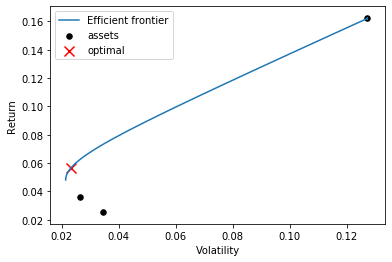

In [9]:
efficient_portfolio.max_sharpe()
efficient_portfolio.plot_efficient_frontier()

## Error will occur if the cell above was never executed

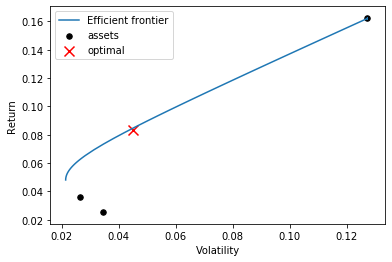

In [10]:
weights = {'GOVT': 0.3, 'SPY': 0.4, 'AGG': 0.3}
efficient_portfolio.set_weights(weights)
efficient_portfolio.plot_efficient_frontier()

## 2 Assets will have error

In [11]:
tickers = ['GOVT','SPY']
prices = prices[tickers]

In [12]:
e_return = mean_historical_return(prices, frequency = 252)
e_cov = CovarianceShrinkage(prices).ledoit_wolf()

print(e_return)
print(e_cov)

GOVT    0.025693
SPY     0.162040
dtype: float64
          GOVT       SPY
GOVT  0.001277 -0.002127
SPY  -0.002127  0.016170


In [13]:
efficient_portfolio = CLA(e_return, e_cov)

TypeError: 'int' object is not subscriptable